#                        Traditional Hypothesis Tests
##                             And How to Run Them in Python

Below you will find examples of the traditional hypothesis tests and analyses typically taught in an Intro Stat course.  Each cell is self-contained, which means that I reload the modules necessary for each test over and over again.  However, it also means that you can simply copy & paste an entire cell when you try to replicate something that is demonstrated here.  

This is just a guide with some code for you to copy.  No explanations are given here.

In [2]:
from datascience import *
import numpy as np
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Need some data to use in examples

births = Table.read_table('baby.csv')
counties = Table.read_table('counties.csv')
crime = Table.read_table('crime_rates.csv')

# Two Sample T-test

Used to compare means of two samples.

Accepts directed alternatives.  

In [2]:
# Two Sample T-test

group1 = births.where("Maternal Smoker", True).column("Birth Weight")
group2 = births.where("Maternal Smoker", False).column("Birth Weight")

Results = scipy.stats.ttest_ind(group1, group2, equal_var = False)  # Default is two-tailed test

# For a directed alternative, uncomment the one below with the correct direction.

#Results = scipy.stats.ttest_ind(group1, group2, equal_var = False, alternative ="greater")

#Results = scipy.stats.ttest_ind(group1, group2, equal_var = False, alternative ="less")

print("Results of 2-Sample T-test")

print(f"The test statistic is t = {Results[0]}, and p-value = {Results[1]}.")


Results of 2-Sample T-test
The test statistic is t = -8.626464445756927, and p-value = 2.6564639952299482e-17.


# Matched Pairs T-test

Used to look for differences when sampling the same group twice.

Accepts a directed alternative.

In [3]:
# Matched Pairs T-test

GA = crime.where("State", "Georgia").sort("Year").column("Murder Rate")  ## In this example
AL = crime.where("State", "Alabama").sort("Year").column("Murder Rate")  ## they are matched by year

import scipy.stats
Results = scipy.stats.ttest_rel(GA, AL)  # Change to groups defined above

# For a directed alternative, uncomment the one below with the correct direction.

#Results = scipy.stats.ttest_rel(GA, AL, alternative = "greater")

#Results = scipy.stats.ttest_rel(GA, AL, alternative = "less")


print("Results of Matched Pairs T-test")

print(f"The test statistic is t = {Results[0]}, and p-value = {Results[1]}.")

Results of Matched Pairs T-test
The test statistic is t = 1.8652219662926406, and p-value = 0.06898323125568474.


# Chi-squared test for Independence

Used to look for associations between categorical data.  Data must be arranged in an array, as a two-way table.  

Suppose you wanted to run a $\chi^2$ test for independence on this table:
 
 <table> 
    <tr>
        <th>14 </th>
        <th>2 </th>
    </tr>
    <tr>
        <th>6 </th>
        <th>9 </th>
    </tr>
        </table>
 

In [4]:
# Chi-squared test for independence
import numpy as np
obs = np.array([[14, 2], [6,9]])  # Put data into array structure

import scipy.stats
Results = scipy.stats.chi2_contingency(obs)

## Don't change anything below this line

print("Chi-Square = ", Results[0])
print("p-value = ", Results[1])
print("degrees of freedom = ", Results[2])
print("Expected Table = ")
print(Results[3])

print("Reminder: No zero cells, and not more than 20% with counts below 5 in Expected Table.")



Chi-Square =  5.696396780303031
p-value =  0.016999777502603477
degrees of freedom =  1
Expected Table = 
[[10.32258065  5.67741935]
 [ 9.67741935  5.32258065]]
Reminder: No zero cells, and not more than 20% with counts below 5 in Expected Table.


# Chi-squared Test for Goodness-of-Fit

Used to test is sample counts fit an expected count based on assumed population proportions.  


In [5]:
# Chi-squared goodness-of-fit

obs_counts = make_array(24, 20, 18, 5, 7, 1)  # Test is expecting COUNTS!
total = sum(obs_counts)

pred_counts = make_array(.24, .20, .15, .13, .13, .05)*total  # Turn proportions into COUNTS!

import scipy.stats
Results = scipy.stats.chisquare(obs_counts, pred_counts)

print("Results of Chi-squared GoF Test")

print(f"The test statistic is Chi^2 = {Results[0]}, and p-value = {Results[1]}.")


Results of Chi-squared GoF Test
The test statistic is Chi^2 = 12.823076923076922, and p-value = 0.025094358777833156.


# Binomial Test

Used to test for differences in proportions with two groups.

To run this test, you designate one group "success" and count successes as well as trials.  

Accepts a directed alternative.

In [6]:
import scipy.stats

successes = 150

trials = 200

null_probability = 0.7

pval = scipy.stats.binom_test(successes, trials, null_probability)

# For a directed alternative, uncomment the one below with the correct direction.

#pval = scipy.stats.binom_test(successes, trials, null_probability, alternative = "greater")

#pval = scipy.stats.binom_test(successes, trials, null_probability, alternative = "less")


print(f"Binomial Test Results: The p-value = {pval}")

Binomial Test Results: The p-value = 0.14233173709397484


# Correlation and Linear Regression


In [7]:
# Correlation

mom_weight = births.column("Maternal Pregnancy Weight")  # Make two arrays of numbers
baby_weight = births.column("Birth Weight")              # one for x and one for y

import scipy.stats
Results = scipy.stats.pearsonr(mom_weight, baby_weight)

print(f"Correlation = {Results[0]}")

Correlation = 0.15592327018706933


In [8]:
# Linear Regression

mom_weight = births.column("Maternal Pregnancy Weight")  # Make two arrays of numbers
baby_weight = births.column("Birth Weight")              # one for x and one for y

import scipy.stats
Results = scipy.stats.linregress(mom_weight, baby_weight)

print(f"Intercept = {Results[1]} and slope = {Results[0]}")
print(f"P-value for Slope ={Results[3]}")
print(f"Correlation = {Results[2]}")

Intercept = 101.75392786147968 and slope = 0.1378329069747063
P-value for Slope =7.887284473933167e-08
Correlation = 0.15592327018706933


A scatterplot featuring the linear regression line is often included with linear regression analysis. 

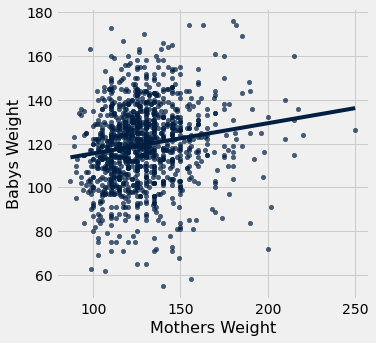

In [9]:
mom_weight = births.column("Maternal Pregnancy Weight")  # Make two arrays of numbers
baby_weight = births.column("Birth Weight")              # one for x and one for y

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from datascience import *

Weights = Table().with_columns("Mothers Weight", mom_weight, "Babys Weight", baby_weight)

Weights.scatter("Mothers Weight", fit_line=True)

# One Sample T-test

Used to compare the mean of a single sample to an assumed population mean.

In [10]:
# One Sample T-test

sample = births.column("Birth Weight")
null_mean = 120

import scipy.stats
Results = scipy.stats.ttest_1samp(sample, null_mean)

# For a directed alternative uncomment the appropriate line below

#Results = scipy.stats.ttest_1samp(sample, null_mean, alternative ="greater")

#Results = scipy.stats.ttest_1samp(sample, null_mean, alternative ="less")

print("Results of 1-Sample T-test")
print(f"The test statistic is t = {Results[0]}, and p-value = {Results[1]}.")



Results of 1-Sample T-test
The test statistic is t = -1.004764597798588, and p-value = 0.31521743438725197.


# Multiple Regression

In [12]:
days = births.column('Gestational Days')

days

array([284, 282, 279, ..., 291, 281, 297])

In [15]:
ones = np.repeat(([1]), len(mom_weight))
X = np.transpose(np.concatenate([ones, mom_weight, days]).reshape(3, len(mom_weight)))
X

array([[  1, 100, 284],
       [  1, 135, 282],
       [  1, 115, 279],
       ...,
       [  1, 150, 291],
       [  1, 110, 281],
       [  1, 129, 297]])

In [22]:
results = np.linalg.lstsq(X, baby_weight);

<ipython-input-22-5a6616b37dc8>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  results = np.linalg.lstsq(X, baby_weight);


In [17]:
results[0]

array([-26.27090399,   0.12938339,   0.46259328])

In [18]:
results[1]

array([320171.29951082])

In [19]:
results[2]

3

In [20]:
results[3]

array([1.05439657e+04, 6.79428706e+02, 1.86187817e+00])

In [28]:
results

(array([-26.27090399,   0.12938339,   0.46259328]),
 array([320171.29951082]),
 3,
 array([1.05439657e+04, 6.79428706e+02, 1.86187817e+00]))

In [25]:
#help(np.linalg.lstsq)

In [27]:
scipy.linalg.lstsq(X, baby_weight)

(array([-26.27090399,   0.12938339,   0.46259328]),
 320171.2995108162,
 3,
 array([1.05439657e+04, 6.79428706e+02, 1.86187817e+00]))

In [29]:
def f(x1, x2):
    return -26.27090399 + 0.12938339*x1 + 0.46259328*x2

In [31]:
f(mom_weight, days)- baby_weight

array([ -1.95607347,   8.64715862, -10.32828902, ...,  -2.24875101,
        -7.05001941,  10.80975748])

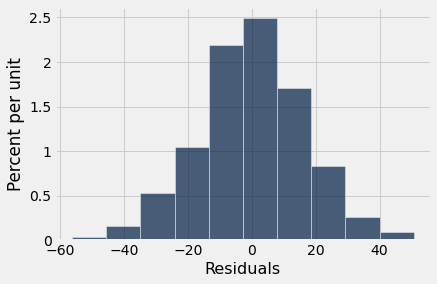

In [32]:
Table().with_column("Residuals", f(mom_weight, days)- baby_weight).hist()

# Polynomial Regression

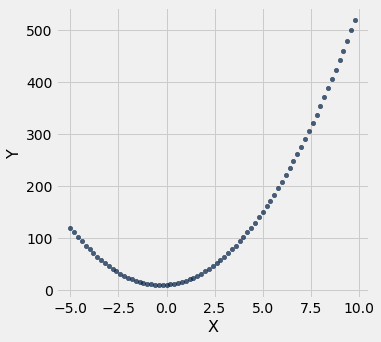

In [46]:
X2 = np.arange(-5, 10, .2)

Y = 10 + 3*X2 + 5*X2**2

Table().with_columns("X",X2,"Y",Y).scatter("X")


In [47]:
ones = np.repeat(([1]), len(X2))
Xgroup = np.transpose(np.concatenate([ones, X2, X2**2]).reshape(3, len(X2)))
#Xgroup

In [48]:
scipy.linalg.lstsq(Xgroup, Y)

(array([10.,  3.,  5.]),
 4.796642468041478e-26,
 3,
 array([315.9402711 ,  23.83373803,   6.2605136 ]))

In [49]:
def f(x1, x2):
    return 10 + 3*x1 +5*x2

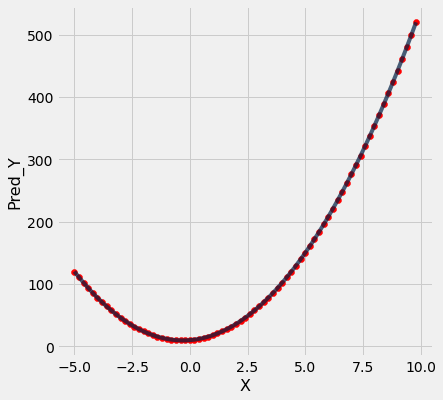

In [53]:
Table().with_columns("X",X2, "Pred_Y", f(X2, X2**2)).plot("X")
plots.scatter(X2, Y, color="r")

In [21]:
#help(np.random.normal)

College_GPA  = np.round(np.random.normal(2.6, 0.5, 125), 2)
College_GPA

array([2.66, 2.19, 2.8 , 2.71, 2.21, 2.99, 2.65, 2.81, 2.46, 2.22, 2.5 ,
       3.1 , 2.16, 2.19, 2.55, 2.62, 3.18, 3.05, 2.19, 2.22, 2.64, 1.82,
       2.56, 1.42, 2.18, 3.19, 2.76, 3.06, 2.87, 1.87, 2.46, 1.95, 2.21,
       2.82, 3.01, 2.53, 2.57, 3.39, 3.1 , 2.58, 2.19, 2.9 , 2.62, 1.87,
       2.8 , 2.25, 2.45, 3.08, 2.35, 2.23, 3.77, 2.23, 1.23, 2.8 , 3.48,
       2.32, 2.54, 3.04, 2.41, 3.16, 2.35, 3.21, 2.35, 2.84, 2.84, 2.68,
       2.74, 2.7 , 3.44, 3.08, 1.86, 3.06, 2.28, 2.7 , 1.64, 2.85, 2.88,
       2.38, 1.87, 2.03, 3.69, 1.91, 2.71, 2.9 , 2.95, 2.1 , 3.14, 3.16,
       2.1 , 1.58, 3.01, 2.98, 2.32, 2.9 , 2.81, 2.43, 2.64, 2.81, 2.89,
       3.11, 2.59, 3.04, 2.99, 2.13, 2.96, 2.23, 3.63, 2.53, 3.29, 2.14,
       2.45, 2.25, 2.69, 2.18, 2.32, 3.04, 3.29, 2.7 , 2.75, 3.09, 1.84,
       2.78, 2.48, 3.  , 2.28])

In [17]:
GPA = np.round(IQ/35, 2)
GPA = 4.0 - max(GPA)+GPA
GPA

array([3.06, 4.  , 2.8 , 2.83, 3.14, 2.97, 2.72, 2.52, 3.86, 3.6 , 3.57,
       3.26, 2.97, 2.54, 2.97, 3.34, 2.6 , 2.83, 2.8 , 3.8 , 2.06, 3.37,
       3.23, 3.57, 2.23, 3.52, 3.03, 3.26, 2.63, 3.03, 3.57, 2.97, 2.6 ,
       2.66, 2.46, 2.86, 2.77, 2.92, 3.09, 2.8 , 3.37, 2.69, 2.8 , 3.57,
       2.83, 3.92, 3.12, 3.06, 3.06, 3.29, 3.  , 3.54, 2.89, 2.63, 2.86,
       2.74, 2.6 , 3.57, 2.66, 2.69, 2.86, 2.92, 3.23, 3.4 , 3.14, 2.66,
       3.09, 3.6 , 3.43, 3.17, 2.57, 3.4 , 3.69, 3.14, 3.23, 2.66, 2.72,
       3.29, 3.34, 2.77, 2.77, 3.57, 3.  , 3.49, 3.2 , 3.46, 3.12, 3.43,
       3.32, 2.74, 3.72, 2.94, 3.6 , 2.92, 3.12, 2.8 , 3.17, 2.37, 3.34,
       2.74, 3.09, 2.69, 3.09, 2.43, 2.6 , 2.57, 2.83, 2.83, 3.03, 2.92,
       3.14, 3.14, 2.77, 3.83, 3.8 , 3.26, 2.8 , 2.49, 2.8 , 3.37, 2.46,
       3.34, 3.32, 3.03, 2.23])

In [1]:
help(percentile)

NameError: name 'percentile' is not defined

In [ ]:
orig_sample = Table().read_table("Sample.csv")

new_means = make_array()

for i in np.arange(1000):
    new_mean = np.average(new_means.sample().column("Weight"))
    new_means = np.append(new_means, new_mean)

Lower_bd = percentile(2.5, new_means)
Upper_bd = percentile(97.5, new_means)

print(f"The 95% confidence interval is from {Lower_bd} to {Upper_bd}")
